In [1]:
import h5py
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'h5py'

In [3]:
# Load the tracked data
#filename = '/Users/emily/code/collaborative-intelligence/elm_central_park_birds/labels.v001.000_20230228114700231_n10_20_bone.analysis.h5'
filename = 'labels.v001.000_20230228114700231_n10_20_bone.analysis.h5'
# filename = '/Users/emily/data/FLIRcam/ForTracking/use_me/labels.v001.002_20230202112357547_n10_20_bone.analysis.h5'
with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print(filename)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
labels.v001.000_20230228114700231_n10_20_bone.analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(2123, 3, 2, 22)

===nodes===
0: eye
1: base_leg
2: base_tail



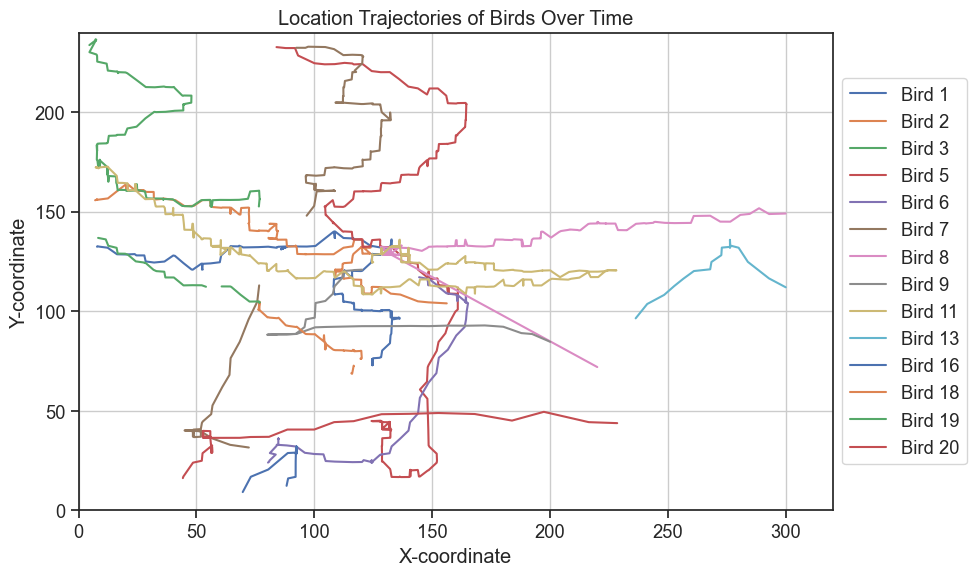

In [66]:
# Plot the trajectories

# Create a single plot
plt.figure(figsize=(10, 6))

# Loop through each bird to plot its trajectory
for bird in range(22):
    # Extract x and y coordinates for the bird across all timesteps
    x_coordinates = locations[:, 0, 0, bird]
    y_coordinates = locations[:, 0, 1, bird]

    non_nan_count = np.sum(~np.isnan(x_coordinates))
    if non_nan_count > 30:
        plt.plot(x_coordinates, y_coordinates, label=f'Bird {bird+1}')

# Setting labels, title, limits, and legend
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("Location Trajectories of Birds Over Time")
plt.xlim((0, 320))
plt.ylim((0, 240))
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()
plt.show()

In [67]:
# Put data into dataframe format
data_list = []

# Iterate over the locations array
for t in range(locations.shape[0]):
    for bird in range(locations.shape[3]):
        x = locations[t, 0, 0, bird]
        y = locations[t, 0, 1, bird]
        # Check if x and y are not NaN before appending
        if not (np.isnan(x) or np.isnan(y)):
            data_list.append({'x': x, 'y': y, 'time': t, 'bird': bird})


# Convert to pandas DataFrame
df = pd.DataFrame(data_list)

print(df)

               x           y  time  bird
0     124.700294   72.926094     0     0
1     156.153030  103.940567     0     1
2      76.500145  152.607285     0     2
3     124.667969   72.846458     1     0
4     148.427032  104.434341     1     1
...          ...         ...   ...   ...
5431   52.606262   28.646847  2118    19
5432   52.280090   24.862953  2119    19
5433   48.553352   23.911976  2120    19
5434   44.468704   16.924572  2121    19
5435   44.253929   16.146448  2122    19

[5436 rows x 4 columns]
